<a href="https://colab.research.google.com/github/Marzerp/Pokemon_Statistics/blob/main/Analisis_Pokemon_proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto de Análisis de Datos de Pokémon


### Autores:
#####Araceli Romero, Daniel Rangel

### Fecha:
##### Abril 2025

##Descripción:
#####Este proyecto realiza una limpieza, análisis descriptivo, muestreo y pruebas estadísticas sobre un dataset de Pokémon. Se analizan principalmente las variables 'HP' y 'Speed' por tipo y generación.


# 1. Librerias

In [136]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,ttest_1samp, skew, norm,stats,probplot
import scipy.stats as stats
from google.colab import drive
from google.colab import files
from scipy.stats import kruskal

# 2. Limpieza de datos

In [137]:
# Leer el dataset
df= pd.read_csv("Pokemon.csv")

In [138]:
# Revisar información inicial del dataset
df.info()
df.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   total       1072 non-null   object
 4   hp          1072 non-null   int64 
 5   attack      1072 non-null   int64 
 6   defense     1072 non-null   int64 
 7   sp_attack   1072 non-null   int64 
 8   sp_defense  1072 non-null   int64 
 9   speed       1072 non-null   int64 
 10  generation  1072 non-null   int64 
 11  legendary   1072 non-null   bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 93.3+ KB


1072

In [139]:
# Limpiar la columna 'total' y corregir nombres de columnas
df['total'] = df['total'].str.replace(',','').astype(int)
df = df.rename(columns={'type1': 'type'})

df.info()
df.groupby('generation').size()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1072 non-null   int64 
 1   name        1072 non-null   object
 2   type        1072 non-null   object
 3   total       1072 non-null   int64 
 4   hp          1072 non-null   int64 
 5   attack      1072 non-null   int64 
 6   defense     1072 non-null   int64 
 7   sp_attack   1072 non-null   int64 
 8   sp_defense  1072 non-null   int64 
 9   speed       1072 non-null   int64 
 10  generation  1072 non-null   int64 
 11  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(2)
memory usage: 93.3+ KB


,0
generation,
0,3
1,178
2,106
3,160
4,121
5,166
6,85
7,114
8,139


In [140]:
# Corregir errores en 'generation' y en los nombres de 'type'
df.loc[df['generation'] == 0, 'generation'] = 7   # Cambiar todos los que tienen generación 0 a generación 7
df['type'] = df['type'].str.replace('Graaass', 'Grass')
df['type'] = df['type'].str.replace('Graass', 'Grass')
df['type'] = df['type'].str.replace('Blastoise', 'Water')
df['type'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Dark', 'Poison',
       'Electric', 'Ground', 'Ice', 'Fairy', 'Steel', 'Fighting',
       'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying'], dtype=object)

#3. Presentación de los datos

In [141]:
# Cantidad de Pokémon por generación
generation = df.groupby('generation').size()
generation

,0
generation,
1,178
2,106
3,160
4,121
5,166
6,85
7,117
8,139


In [142]:
#cantidad de pokemon por typo:
tipo=df.groupby('type').size()
tipo

,0
type,
Bug,83
Dark,48
Dragon,41
Electric,63
Fairy,23
Fighting,45
Fire,67
Flying,9
Ghost,43


como tenemos solo 9 datos en Flying la borraremos para evitar sesgos de datos

In [143]:
df=df[df['type']!='Flying']

In [144]:
# Clasificación manual de tipos de variable
tipos_variable = {
    'id': 'Cuantitativa discreta',
    'name': 'Cualitativa nominal',
    'type': 'Cualitativa nominal',
    'total': 'Cuantitativa discreta',
    'hp': 'Cuantitativa discreta',
    'attack': 'Cuantitativa discreta',
    'defense': 'Cuantitativa discreta',
    'sp_attack': 'Cuantitativa discreta',
    'sp_defense': 'Cuantitativa discreta',
    'speed': 'Cuantitativa discreta',
    'generation': 'Cualitativa nominal',
    'legendary': 'Cualitativa nominal'
}

# Cantidad de datos por variable
cantidad_datos = df.count()

In [145]:
# Crear tabla de resumen
tabla_variables = pd.DataFrame({
    'Variable': cantidad_datos.index,
    'Cantidad de datos': cantidad_datos.values,
    'Tipo de variable': [tipos_variable[col] for col in cantidad_datos.index]
})
tabla_variables

,Variable,Cantidad de datos,Tipo de variable
0,id,1063,Cuantitativa discreta
1,name,1063,Cualitativa nominal
2,type,1063,Cualitativa nominal
3,total,1063,Cuantitativa discreta
4,hp,1063,Cuantitativa discreta
5,attack,1063,Cuantitativa discreta
6,defense,1063,Cuantitativa discreta
7,sp_attack,1063,Cuantitativa discreta
8,sp_defense,1063,Cuantitativa discreta
9,speed,1063,Cuantitativa discreta


# Correlaciones! yay

In [146]:
df.corr(numeric_only=True)


,id,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
id,1.000000,0.156226,0.133981,0.144648,0.119083,0.108342,0.089231,0.027899,0.869712,0.195717
total,0.156226,1.000000,0.650198,0.733629,0.629866,0.726383,0.713232,0.552293,0.086737,0.515369
hp,0.133981,0.650198,1.000000,0.454093,0.299301,0.361093,0.386142,0.174570,0.085715,0.336888
attack,0.144648,0.733629,0.454093,1.000000,0.459525,0.359764,0.258046,0.364013,0.106437,0.341572
defense,0.119083,0.629866,0.299301,0.459525,1.000000,0.218950,0.534930,0.002638,0.076842,0.283267
sp_attack,0.108342,0.726383,0.361093,0.359764,0.218950,1.000000,0.506078,0.434253,0.038150,0.397006
sp_defense,0.089231,0.713232,0.386142,0.258046,0.534930,0.506078,1.000000,0.218321,0.036171,0.361656
speed,0.027899,0.552293,0.174570,0.364013,0.002638,0.434253,0.218321,1.000000,0.003681,0.346325
generation,0.869712,0.086737,0.085715,0.106437,0.076842,0.038150,0.036171,0.003681,1.000000,0.128087
legendary,0.195717,0.515369,0.336888,0.341572,0.283267,0.397006,0.361656,0.346325,0.128087,1.000000


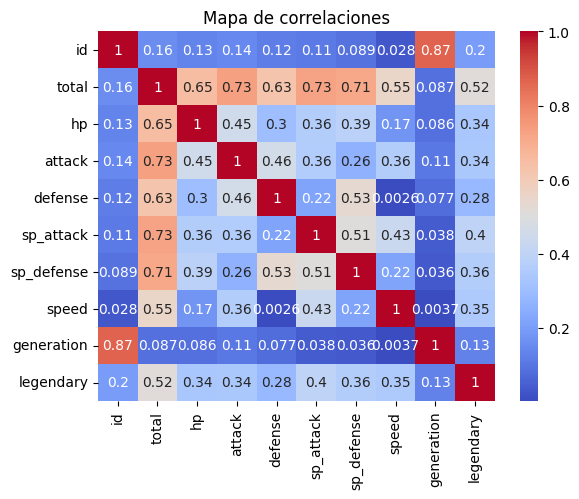

In [182]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Mapa de correlaciones")
plt.show()

como vimos total esta muy relacionado con todas las variables numericas, porque? porque es la suam de todas ellas! asi que la descartaremos para poder hacer buena estadistica

In [183]:
correlacion = df[['speed', 'attack']].corr()
print(correlacion)


           speed    attack
speed   1.000000  0.364013
attack  0.364013  1.000000


# Clustering

bien como ya vimos las correlaciones veremos que show con ataque y velocidad, porque a mas velocidad hay mas ataque? esto se ve cierto por tipo? por generacion? acompañenme a avberiguarlo

In [189]:
stats_por_tipo = df.groupby('type')[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].mean()


In [190]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
stats_scaled = scaler.fit_transform(stats_por_tipo)


In [193]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0)
clusters_tipos = kmeans.fit_predict(stats_scaled)

# Agregar los clusters a la tabla original
stats_por_tipo['cluster'] = clusters_tipos


In [194]:
for c in sorted(stats_por_tipo['cluster'].unique()):
    print(f"\nCluster {c}:")
    print(stats_por_tipo[stats_por_tipo['cluster'] == c].index.tolist())



Cluster 0:
['Fighting', 'Ground']

Cluster 1:
['Ghost']

Cluster 2:
['Dark', 'Fire', 'Grass', 'Ice', 'Poison', 'Water']

Cluster 3:
['Dragon']

Cluster 4:
['Rock', 'Steel']

Cluster 5:
['Psychic']

Cluster 6:
['Bug']

Cluster 7:
['Electric']

Cluster 8:
['Fairy']

Cluster 9:
['Normal']


In [195]:
conteo = df['type'].value_counts()

for c in sorted(stats_por_tipo['cluster'].unique()):
    tipos_cluster = stats_por_tipo[stats_por_tipo['cluster'] == c].index
    tipo_representativo = conteo[tipos_cluster].idxmax()
    print(f"Cluster {c} -> Representante: {tipo_representativo}")


Cluster 0 -> Representante: Fighting
Cluster 1 -> Representante: Ghost
Cluster 2 -> Representante: Water
Cluster 3 -> Representante: Dragon
Cluster 4 -> Representante: Rock
Cluster 5 -> Representante: Psychic
Cluster 6 -> Representante: Bug
Cluster 7 -> Representante: Electric
Cluster 8 -> Representante: Fairy
Cluster 9 -> Representante: Normal


muy bien, hicimos 10 clusters para tener aun asi varios tipos de pokemon apra mayor diversidad de datos.

# graficas

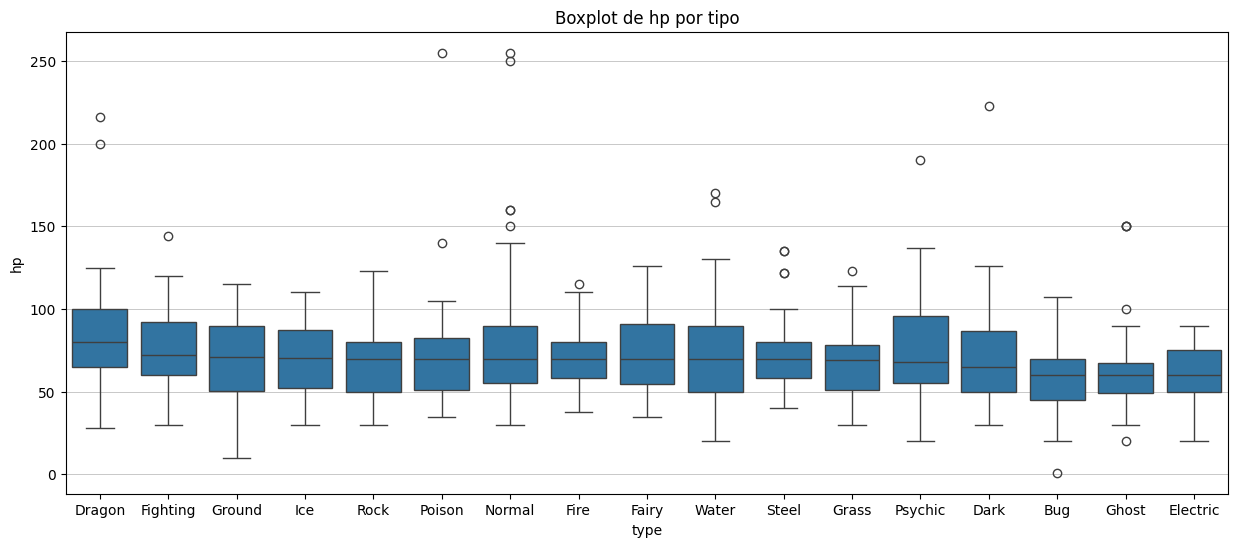

In [148]:
# Boxplot de HP por tipo
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='type', y='hp',order=df.groupby('type')['hp'].median().sort_values(ascending=False).index)
plt.title('Boxplot de hp por tipo')
plt.grid(True, axis='y', linewidth=0.7, alpha=0.7)
plt.show()

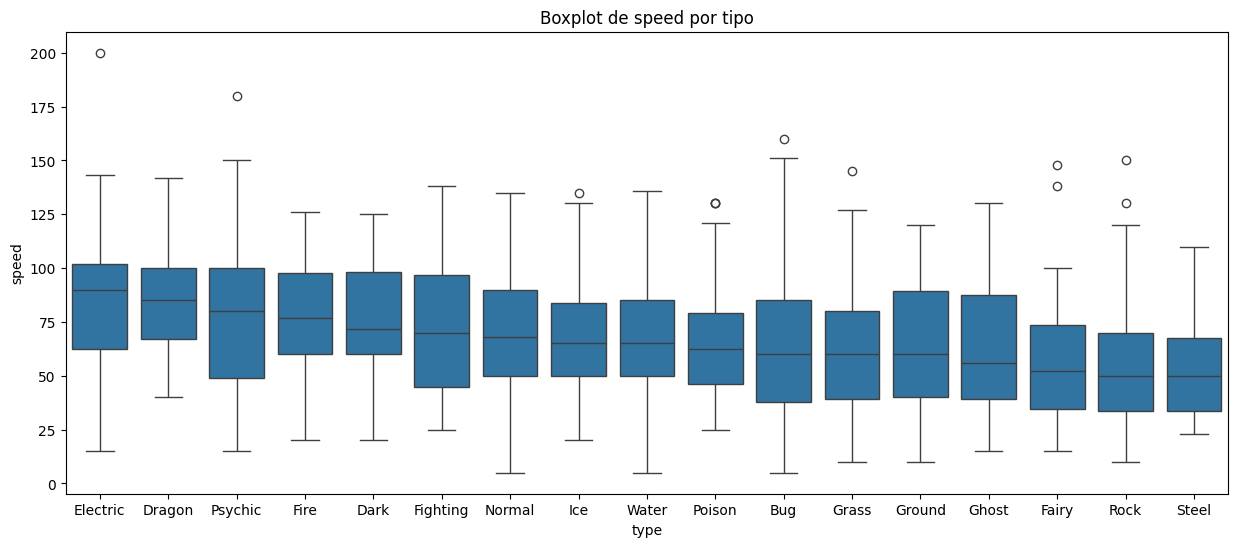

In [149]:
# Boxplot de speed por tipo
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='type', y='speed',order=df.groupby('type')['speed'].median().sort_values(ascending=False).index)
plt.title('Boxplot de speed por tipo')
plt.show()

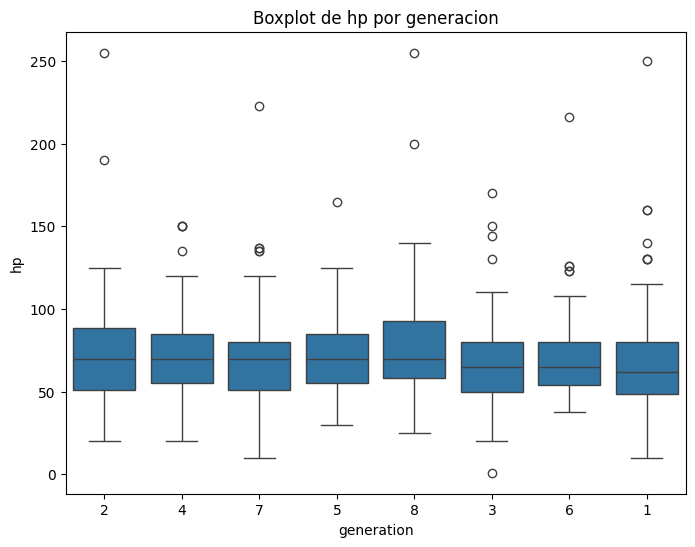

In [150]:
# Boxplot de HP por generación
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='generation', y='hp',order=df.groupby('generation')['hp'].median().sort_values(ascending=False).index)
plt.title('Boxplot de hp por generacion')
plt.show()

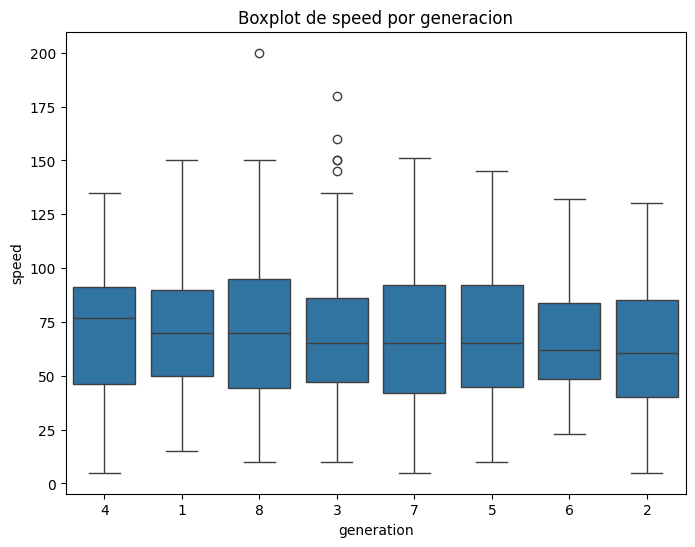

In [151]:
# Boxplot de speed por generación
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='generation', y='speed',order=df.groupby('generation')['speed'].median().sort_values(ascending=False).index)
plt.title('Boxplot de speed por generacion')
plt.show()

# 4. Estadística descriptiva

In [152]:
# Función para calcular resumen estadístico
def resumen_estadistico(df):
  re = pd.DataFrame({
    'Media': df.mean(),
    'Mediana': df.median(),
    'Moda': df.mode().iloc[0],
    'Desviación estándar': df.std(ddof=1),
    'Varianza': df.var(ddof=1),
    'Mínimo': df.min(),
    'Máximo': df.max(),
    'Asimetría': df.apply(skew)
  })
  return re.round(2)

Resumen estadistico para hp y speed general

In [153]:
# ahora usamos la funcion de resumen apra la velocidad y hp para todos los tipos y todas la generaciones
print(resumen_estadistico(df[['hp', 'speed']]))

       Media  Mediana  Moda  Desviación estándar  Varianza  Mínimo  Máximo  \
hp     70.47     68.0  60.0                26.91    724.37       1     255   
speed  68.66     65.0  50.0                30.08    904.59       5     200   

       Asimetría  
hp          1.77  
speed       0.42  



Resumen estadistico por tipo

In [154]:
# Aplicar resumen para diferentes subconjuntos
# De manera más corta
tipo=df.groupby('type')
for i, data in tipo:
    subset = data[['hp', 'speed']]
    print(f"Resumen estadístico tipo - {i}")
    print(resumen_estadistico(subset))
    print("\n")

Resumen estadístico tipo - Bug
       Media  Mediana  Moda  Desviación estándar  Varianza  Mínimo  Máximo  \
hp     57.10     60.0  60.0                17.13    293.58       1     107   
speed  63.42     60.0  40.0                33.59   1128.05       5     160   

       Asimetría  
hp         -0.34  
speed       0.74  


Resumen estadístico tipo - Dark
       Media  Mediana  Moda  Desviación estándar  Varianza  Mínimo  Máximo  \
hp     71.31     65.0    65                31.55    995.50      30     223   
speed  76.94     71.5    60                25.72    661.29      20     125   

       Asimetría  
hp          2.40  
speed       0.09  


Resumen estadístico tipo - Dragon
       Media  Mediana  Moda  Desviación estándar  Varianza  Mínimo  Máximo  \
hp     85.24     80.0  80.0                37.13   1378.39      28     216   
speed  84.34     85.0  80.0                24.15    583.03      40     142   

       Asimetría  
hp          1.65  
speed      -0.10  


Resumen estadístico t

Resumen estadistico por generacion

In [155]:
gen=df.groupby('generation')
for i, data in gen:
    subset = data[['hp', 'speed']]
    print(f"Resumen estadístico generacion - {i}")
    print(resumen_estadistico(subset))
    print("\n")

Resumen estadístico generacion - 1
       Media  Mediana  Moda  Desviación estándar  Varianza  Mínimo  Máximo  \
hp     66.56     62.0    65                28.79    828.84      10     250   
speed  72.71     70.0    90                29.18    851.70      15     150   

       Asimetría  
hp          1.99  
speed       0.37  


Resumen estadístico generacion - 2
       Media  Mediana  Moda  Desviación estándar  Varianza  Mínimo  Máximo  \
hp     71.21     70.0    75                30.59    935.71      20     255   
speed  61.81     60.5    85                27.26    743.28       5     130   

       Asimetría  
hp          2.53  
speed       0.18  


Resumen estadístico generacion - 3
       Media  Mediana  Moda  Desviación estándar  Varianza  Mínimo  Máximo  \
hp     66.54     65.0    70                24.06    578.87       1     170   
speed  66.92     65.0    50                31.33    981.69      10     180   

       Asimetría  
hp          0.95  
speed       0.75  


Resumen estad

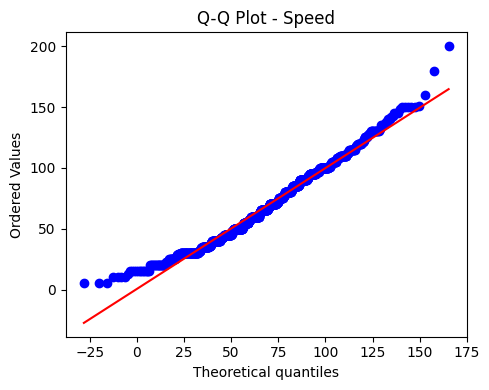

In [156]:
datos = df['speed']
plt.figure(figsize=(5, 4))
stats.probplot(datos, dist="norm", plot=plt, sparams=(datos.mean(), datos.std()))
plt.title("Q-Q Plot - Speed")
plt.tight_layout()
plt.show()

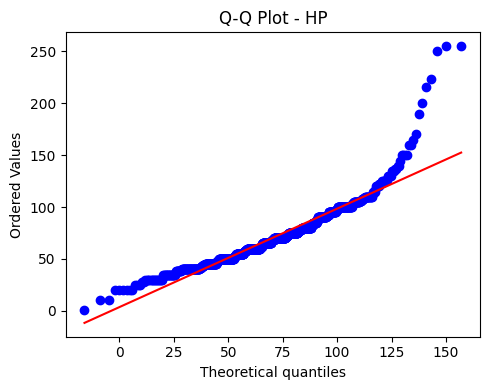

In [157]:
datos = df['hp']
plt.figure(figsize=(5, 4))
stats.probplot(datos, dist="norm", plot=plt, sparams=(datos.mean(), datos.std()))
plt.title("Q-Q Plot - HP")
plt.tight_layout()
plt.show()

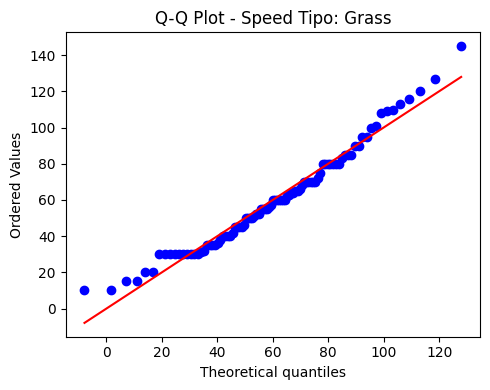

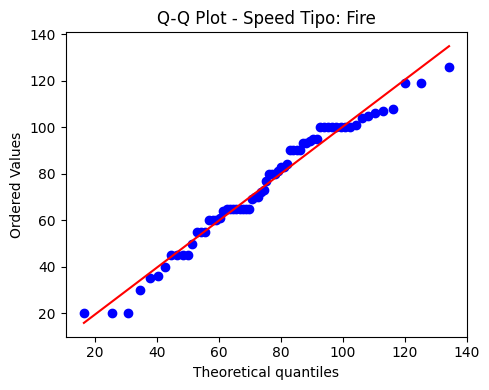

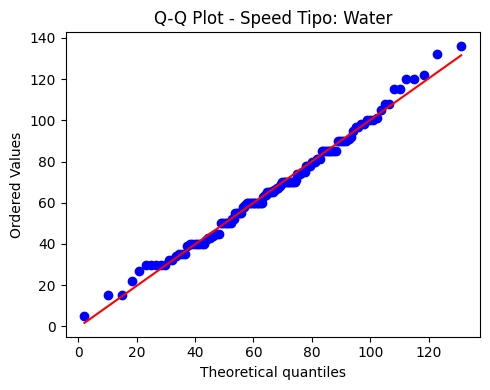

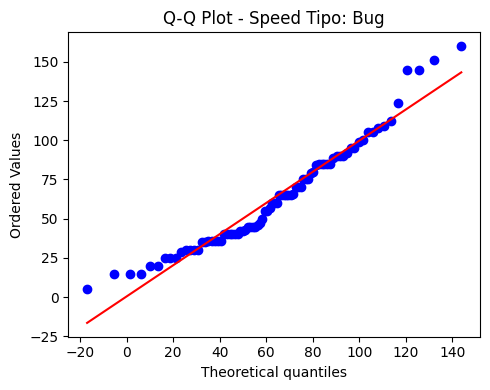

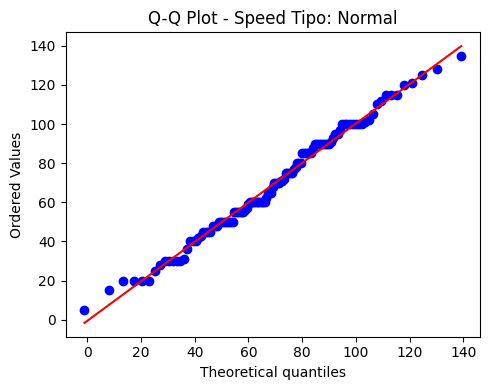

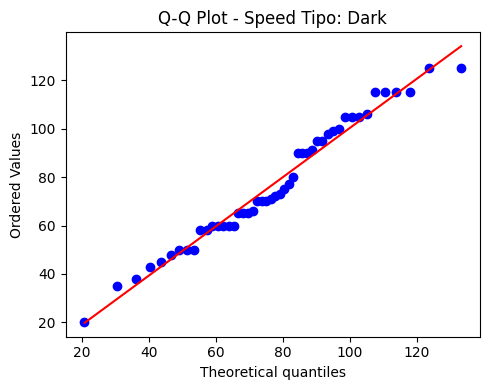

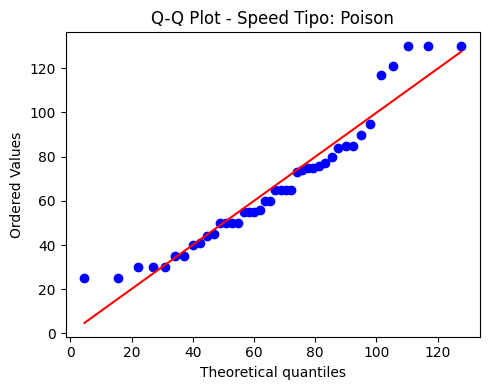

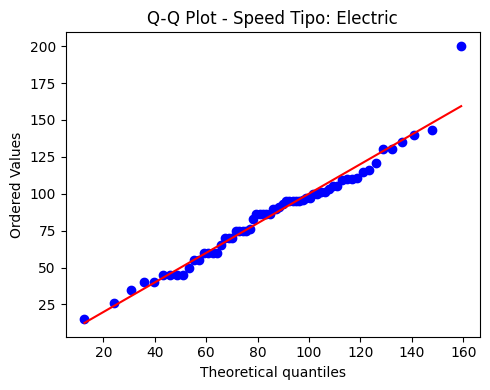

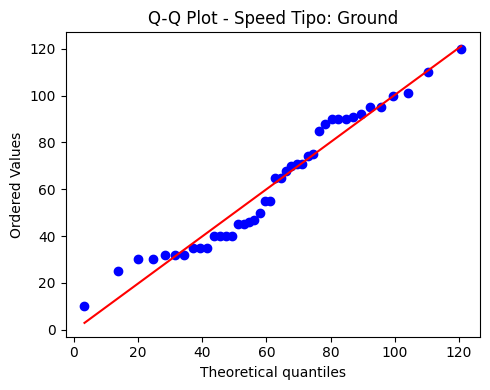

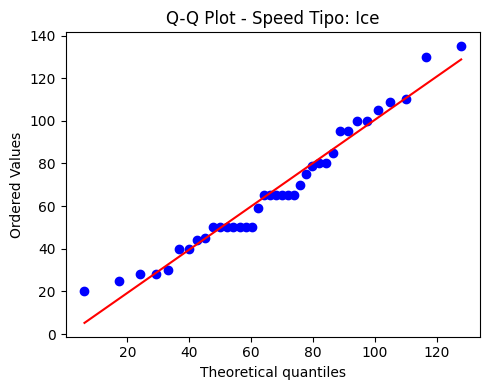

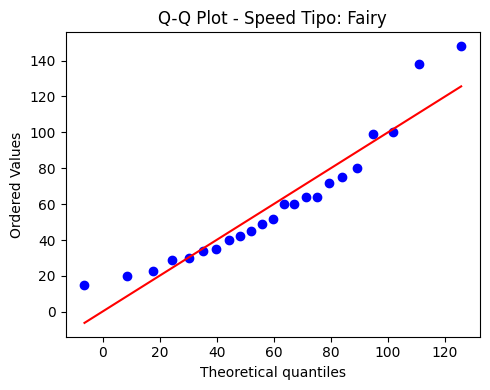

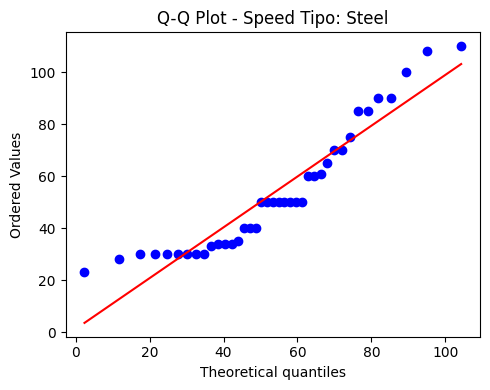

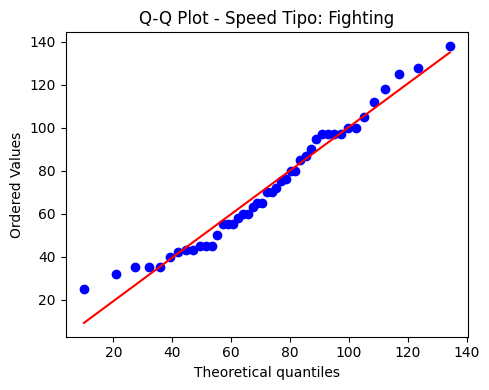

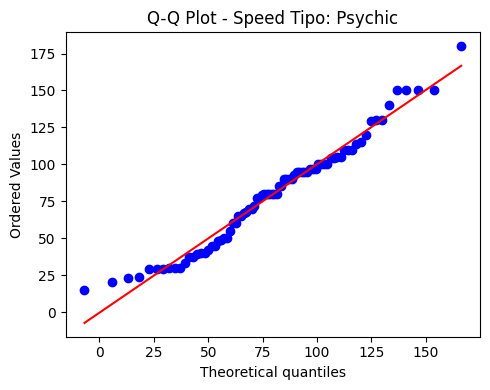

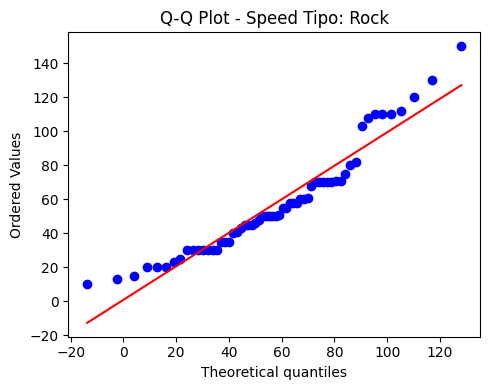

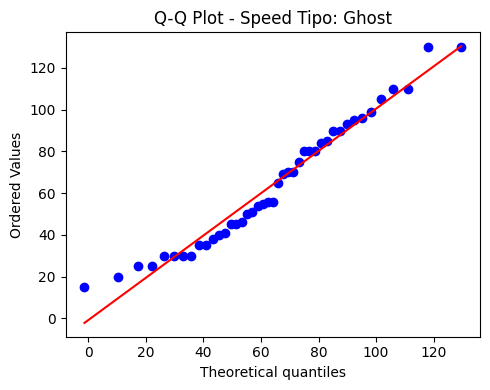

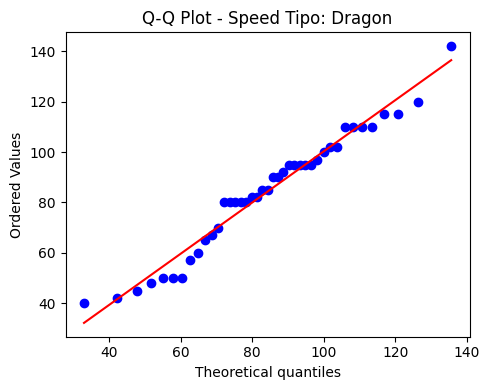

In [158]:
tipos = df['type'].unique()

for tipo in tipos:
    dftype = df.query("type == @tipo")
    datos = dftype['speed']

    plt.figure(figsize=(5, 4))
    stats.probplot(datos, dist="norm", plot=plt , sparams=(datos.mean(),datos.std()))
    plt.title(f"Q-Q Plot - Speed Tipo: {tipo}")
    plt.tight_layout()
    plt.show()


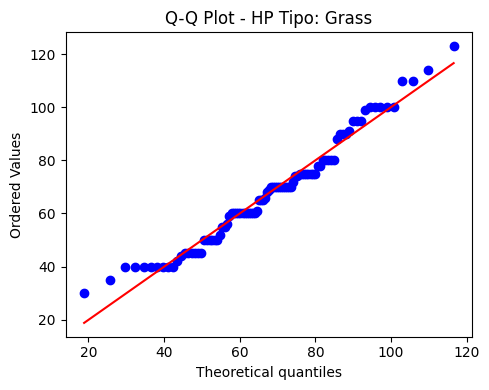

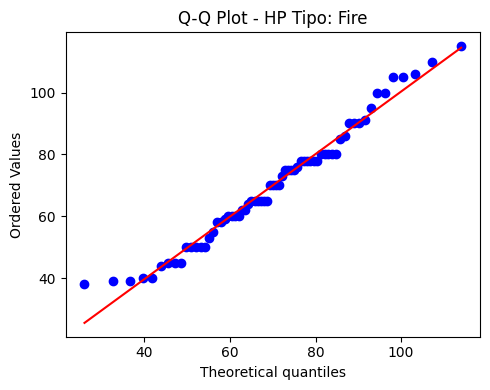

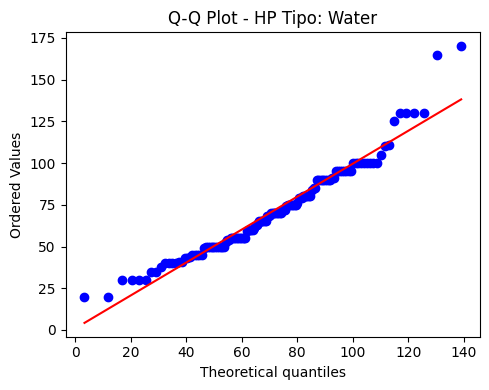

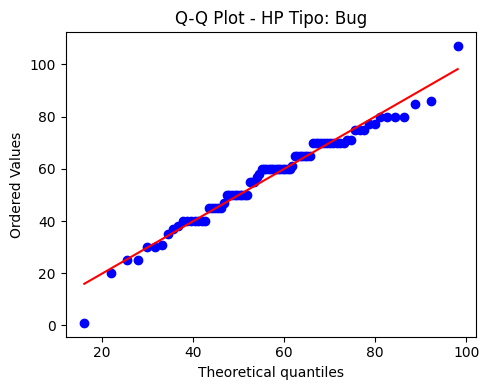

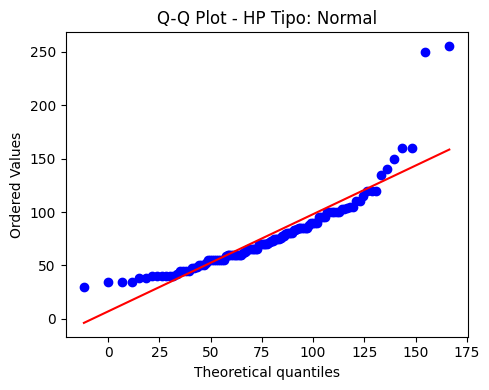

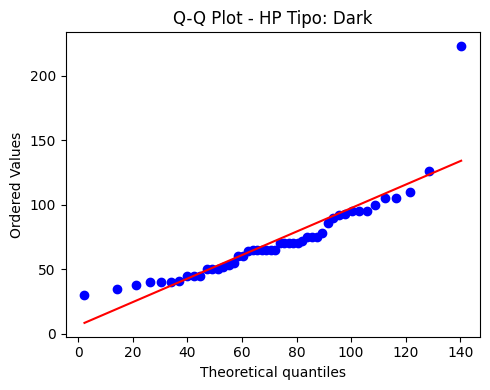

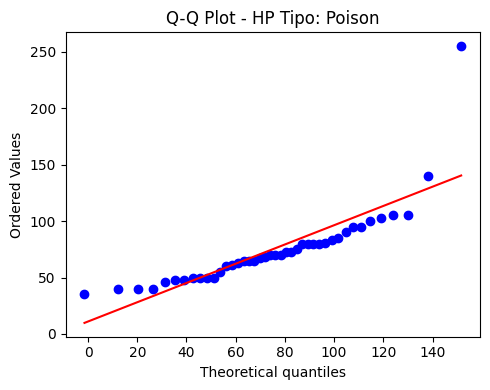

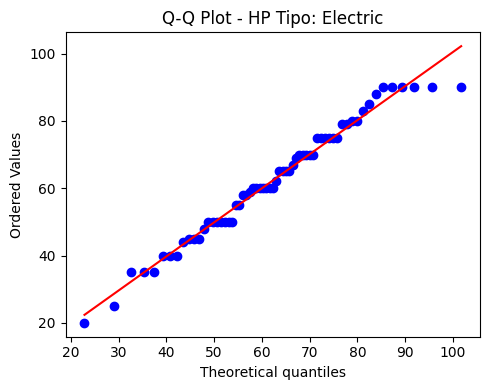

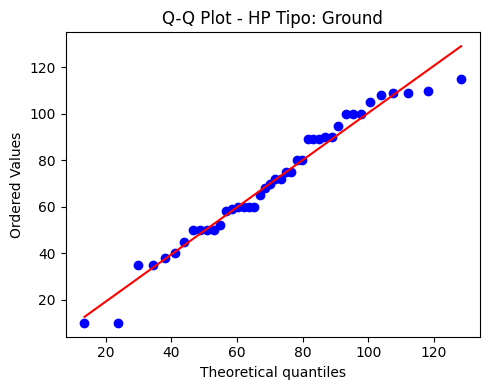

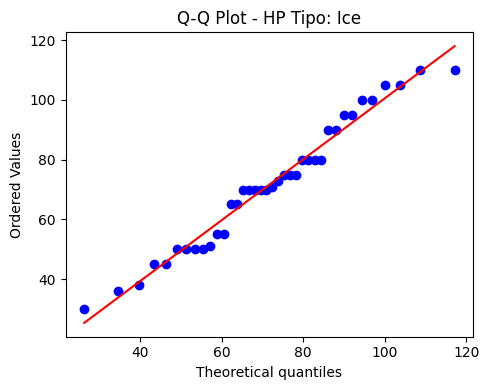

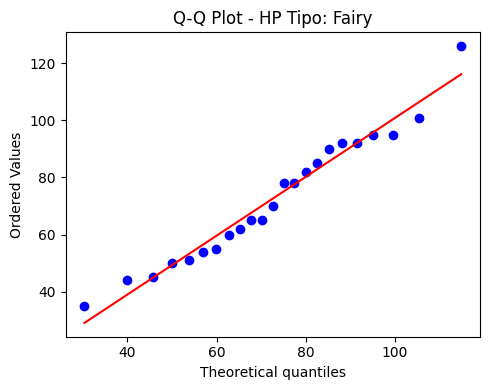

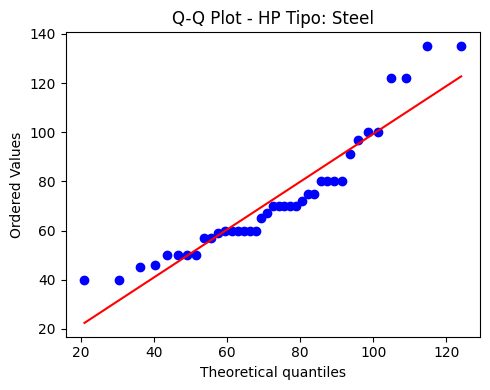

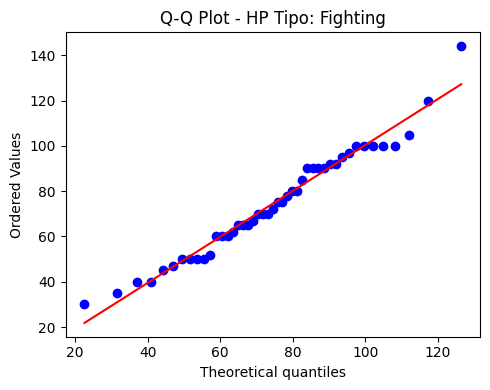

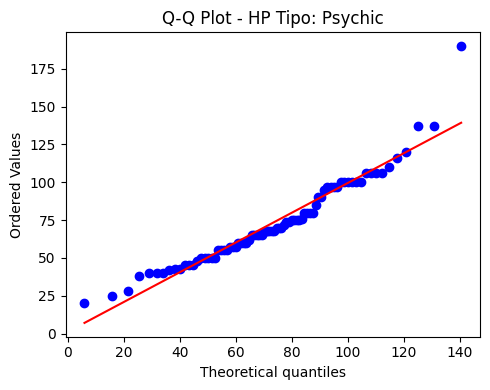

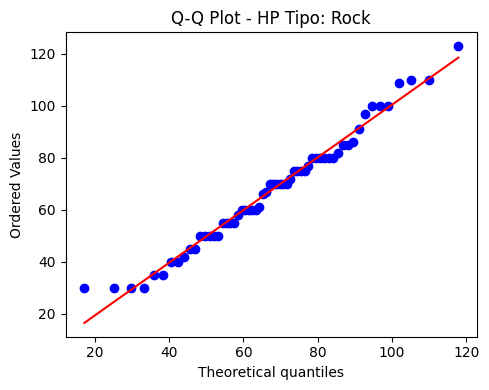

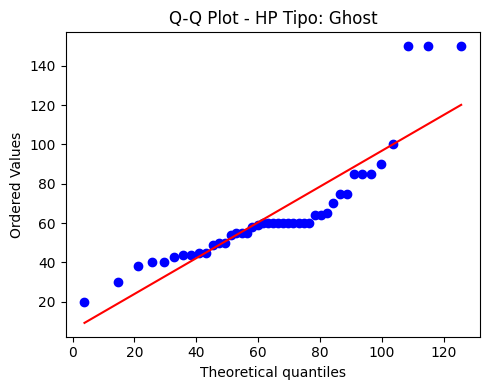

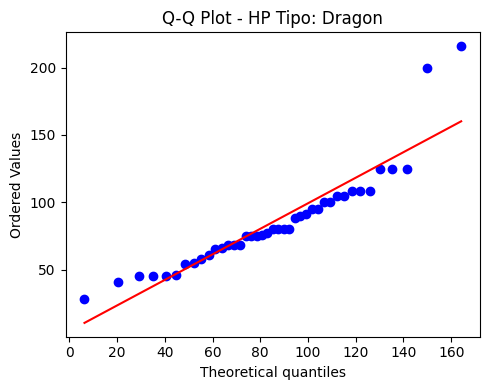

In [159]:
tipos = df['type'].unique()

for tipo in tipos:
    dftype = df.query("type == @tipo")
    datos = dftype['hp']

    plt.figure(figsize=(5, 4))
    stats.probplot(datos, dist="norm", plot=plt , sparams=(datos.mean(),datos.std()))
    plt.title(f"Q-Q Plot - HP Tipo: {tipo}")
    plt.tight_layout()
    plt.show()

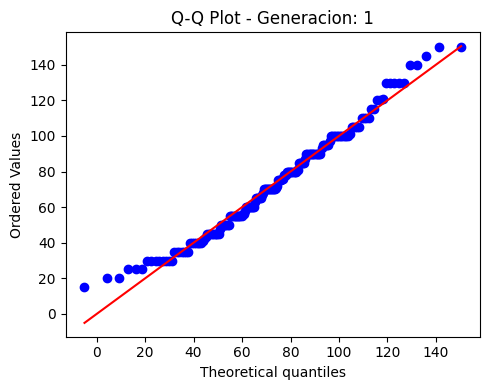

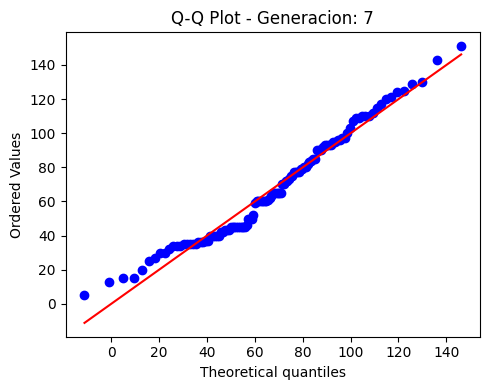

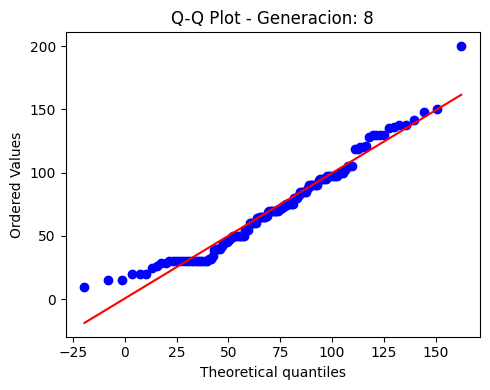

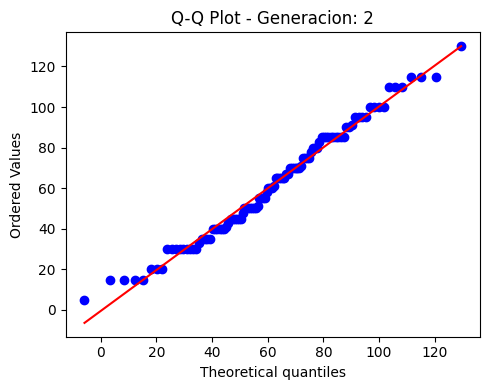

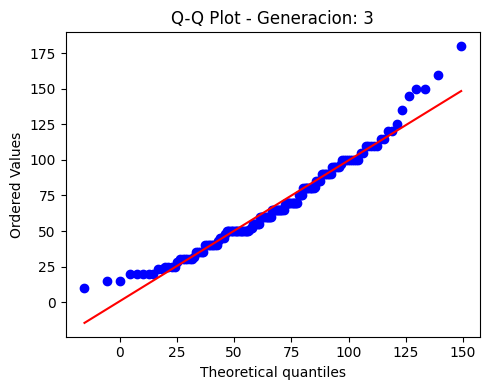

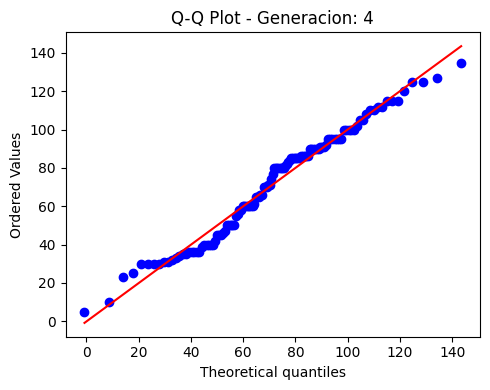

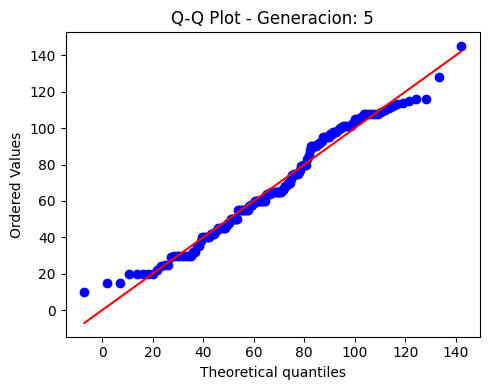

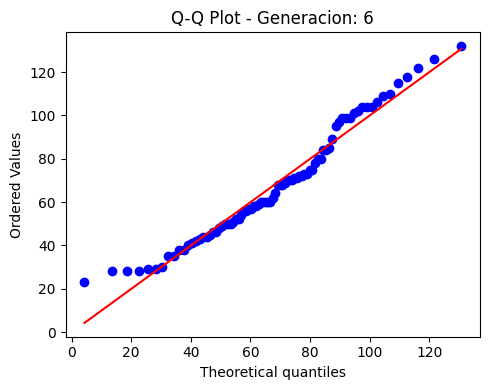

In [160]:

gen = df['generation'].unique()

for generacion in gen:
    dftype = df.query("generation == @generacion")
    datos = dftype['speed']

    plt.figure(figsize=(5, 4))
    stats.probplot(datos, dist="norm", plot=plt, sparams=(datos.mean(),datos.std()))
    plt.title(f"Q-Q Plot - Generacion: {generacion}")
    plt.tight_layout()
    plt.show()


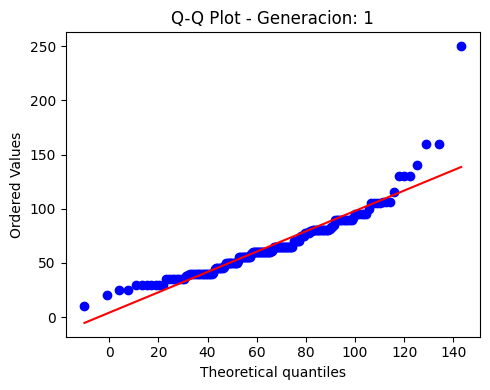

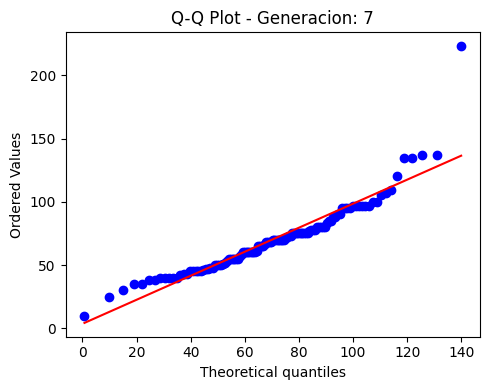

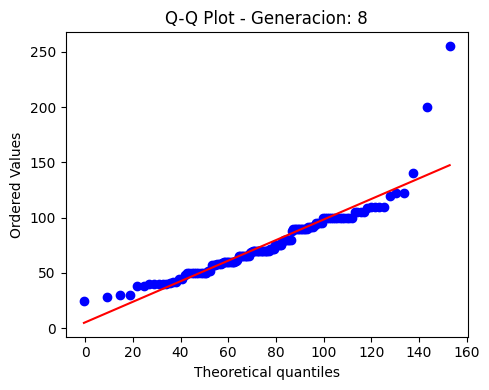

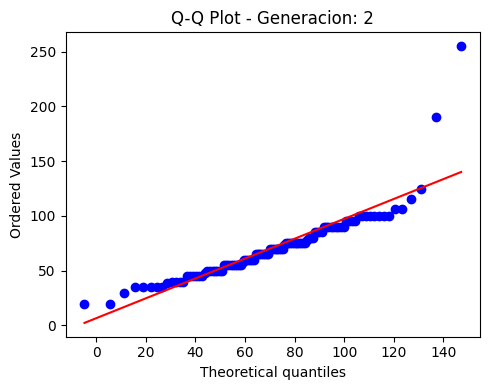

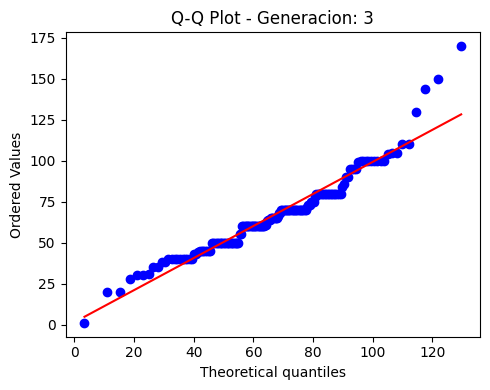

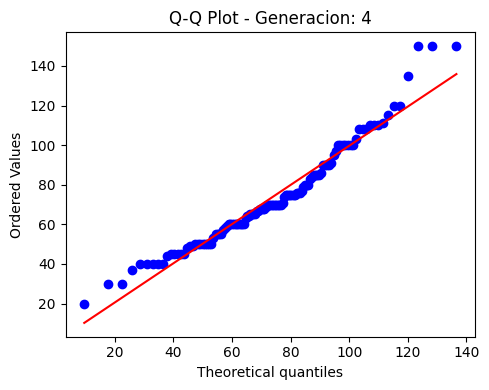

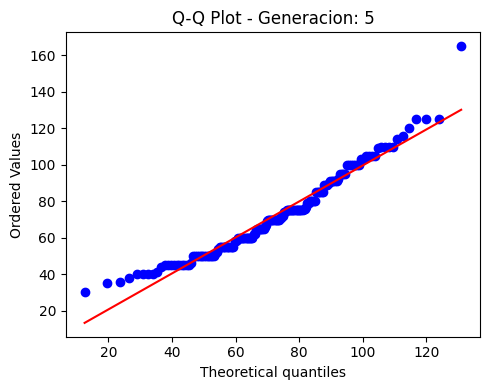

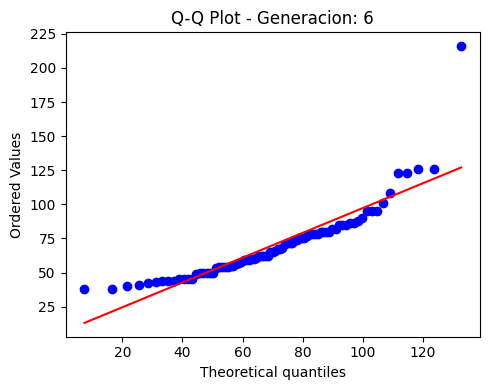

In [161]:

gen = df['generation'].unique()

for generacion in gen:
    dftype = df.query("generation == @generacion")
    datos = dftype['hp']

    plt.figure(figsize=(5, 4))
    stats.probplot(datos, dist="norm", plot=plt, sparams=(datos.mean(),datos.std()))
    plt.title(f"Q-Q Plot - Generacion: {generacion}")
    plt.tight_layout()
    plt.show()

In [162]:
#aplciamos kolmovorob apra generacion pq son mmuchos datos

from scipy.stats import kstest
import pandas as pd

resultados = []

for gen in df['generation'].unique():
    datos = df.query("generation == @gen")['speed']

    # Normalizamos los datos antes de aplicar K-S contra normal estándar
    datos_norm = (datos - datos.mean()) / datos.std()

    estadistico, p_valor = kstest(datos_norm, 'norm')

    resultados.append({
        'generation': gen,
        'estadístico D': estadistico,
        'p-valor': p_valor
    })

    print(f"Generación {gen} -> D: {estadistico:.4f}, p-valor: {p_valor:.4f}")

Generación 1 -> D: 0.0673, p-valor: 0.3797
Generación 7 -> D: 0.1233, p-valor: 0.0521
Generación 8 -> D: 0.0783, p-valor: 0.3656
Generación 2 -> D: 0.0827, p-valor: 0.4400
Generación 3 -> D: 0.0984, p-valor: 0.0842
Generación 4 -> D: 0.1154, p-valor: 0.0736
Generación 5 -> D: 0.0850, p-valor: 0.1766
Generación 6 -> D: 0.1058, p-valor: 0.2897


In [163]:
#aplicamos shapiro para tipo pq son como 50 maso

from scipy.stats import shapiro

resultados_shapiro = []

for gen in df['type'].unique():
    datos = df.query("type == @gen")['speed']

    estadistico, p_valor = shapiro(datos)

    resultados_shapiro.append({
            'type': gen,
            'estadístico W': estadistico,
            'p-valor': p_valor
        })

    print(f"type {gen} -> W: {estadistico:.4f}, p-valor: {p_valor:.4f}")


type Grass -> W: 0.9698, p-valor: 0.0269
type Fire -> W: 0.9707, p-valor: 0.1151
type Water -> W: 0.9909, p-valor: 0.5193
type Bug -> W: 0.9500, p-valor: 0.0028
type Normal -> W: 0.9878, p-valor: 0.3747
type Dark -> W: 0.9705, p-valor: 0.2644
type Poison -> W: 0.9277, p-valor: 0.0108
type Electric -> W: 0.9692, p-valor: 0.1152
type Ground -> W: 0.9496, p-valor: 0.0624
type Ice -> W: 0.9584, p-valor: 0.1682
type Fairy -> W: 0.9028, p-valor: 0.0288
type Steel -> W: 0.8880, p-valor: 0.0010
type Fighting -> W: 0.9625, p-valor: 0.1526
type Psychic -> W: 0.9717, p-valor: 0.0730
type Rock -> W: 0.9264, p-valor: 0.0014
type Ghost -> W: 0.9591, p-valor: 0.1282
type Dragon -> W: 0.9659, p-valor: 0.2521


In [196]:
variables = ['hp','speed','attack','defense','sp_attack','sp_defense']

In [197]:
tipos = df['type'].unique()

for var in variables:
    grupos = [df[df['type'] == tipo][var] for tipo in tipos]

    estadistico, pvalue = kruskal(*grupos)
    print(f"Variable: {var} | Estadístico H: {estadistico:.2f} | p-value: {pvalue:.4f}")


Variable: hp | Estadístico H: 49.86 | p-value: 0.0000
Variable: speed | Estadístico H: 90.77 | p-value: 0.0000
Variable: attack | Estadístico H: 109.93 | p-value: 0.0000
Variable: defense | Estadístico H: 117.05 | p-value: 0.0000
Variable: sp_attack | Estadístico H: 185.40 | p-value: 0.0000
Variable: sp_defense | Estadístico H: 63.00 | p-value: 0.0000


In [200]:
import pandas as pd
import scikit_posthocs as sp

def dunn_posthoc(df, var):
    # Ejecuta Dunn sobre la variable `var`, agrupando por `type`
    # Ajuste de p-values con Bonferroni
    tabla = sp.posthoc_dunn(
        df,
        val_col=var,
        group_col='type',
        p_adjust='bonferroni'
    )
    # Opcional: ordena filas/columnas para lectura
    tabla = tabla.reindex(index=tabla.columns, columns=tabla.columns)
    return tabla

# Ejemplo para 'hp'
tabla_hp = dunn_posthoc(df[['type', 'hp']], 'hp')
print("Dunn post-hoc para HP:")
print(tabla_hp)

# Si quieres hacerlo para todas las variables:
variables = ['hp','speed','attack','defense','sp_attack','sp_defense']
for var in variables:
    print(f"\nDunn post-hoc para {var}:")
    print(dunn_posthoc(df[['type', var]], var))


Dunn post-hoc para HP:
               Bug  Dark    Dragon  Electric     Fairy  Fighting      Fire  \
Bug       1.000000   1.0  0.000049  1.000000  0.757647  0.012615  0.072024   
Dark      1.000000   1.0  1.000000  1.000000  1.000000  1.000000  1.000000   
Dragon    0.000049   1.0  1.000000  0.029461  1.000000  1.000000  1.000000   
Electric  1.000000   1.0  0.029461  1.000000  1.000000  1.000000  1.000000   
Fairy     0.757647   1.0  1.000000  1.000000  1.000000  1.000000  1.000000   
Fighting  0.012615   1.0  1.000000  1.000000  1.000000  1.000000  1.000000   
Fire      0.072024   1.0  1.000000  1.000000  1.000000  1.000000  1.000000   
Ghost     1.000000   1.0  0.022227  1.000000  1.000000  0.950759  1.000000   
Grass     0.408846   1.0  0.669623  1.000000  1.000000  1.000000  1.000000   
Ground    0.215802   1.0  1.000000  1.000000  1.000000  1.000000  1.000000   
Ice       0.132855   1.0  1.000000  1.000000  1.000000  1.000000  1.000000   
Normal    0.000362   1.0  1.000000  0.601

In [199]:
#


!pip install scikit-posthocs






















#hola

# 5. Gráficas descriptivas

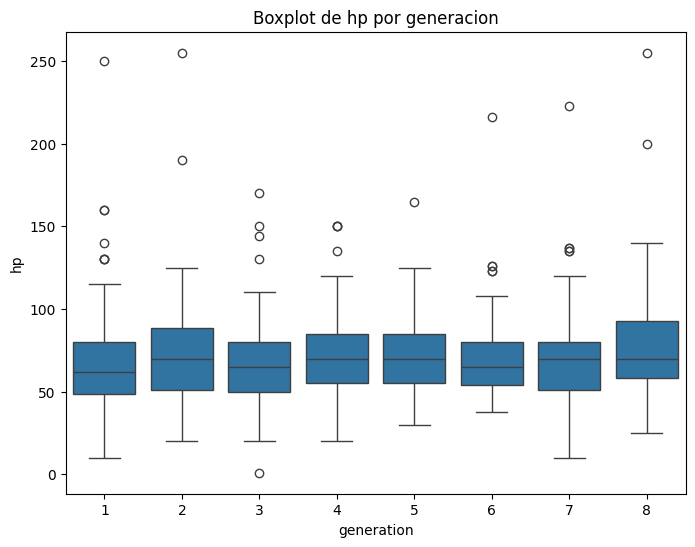

In [167]:
# Boxplot de HP por generación
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='generation', y='hp')
plt.title('Boxplot de hp por generacion')
plt.show()


In [168]:
variables_cuanti = df[['hp', 'speed']]
resumen = resumen_estadistico(variables_cuanti)
print(resumen)

       Media  Mediana  Moda  Desviación estándar  Varianza  Mínimo  Máximo  \
hp     70.47     68.0  60.0                26.91    724.37       1     255   
speed  68.66     65.0  50.0                30.08    904.59       5     200   

       Asimetría  
hp          1.77  
speed       0.42  


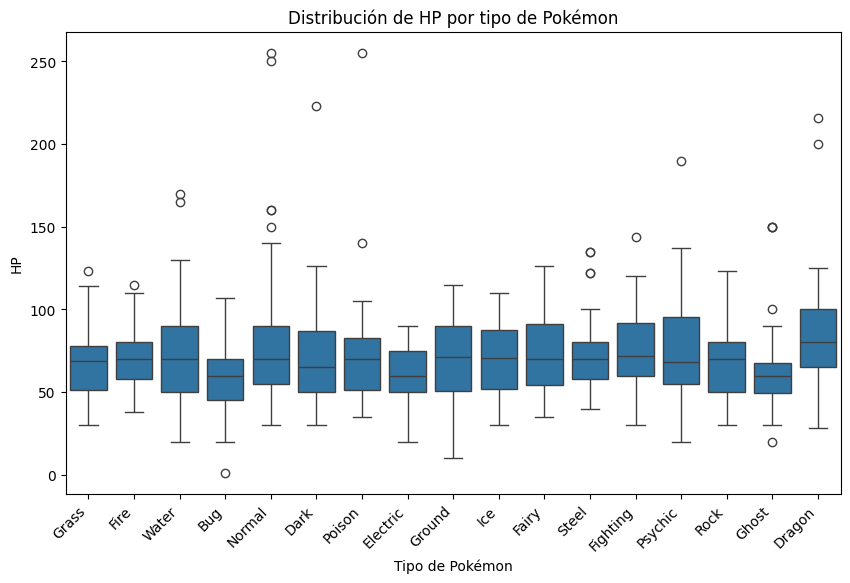

In [169]:
# Boxplot de HP por tipo de Pokémon
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='type', y='hp')
plt.title('Distribución de HP por tipo de Pokémon')
plt.xlabel('Tipo de Pokémon')
plt.ylabel('HP')
plt.xticks(rotation=45, ha='right')
plt.show()

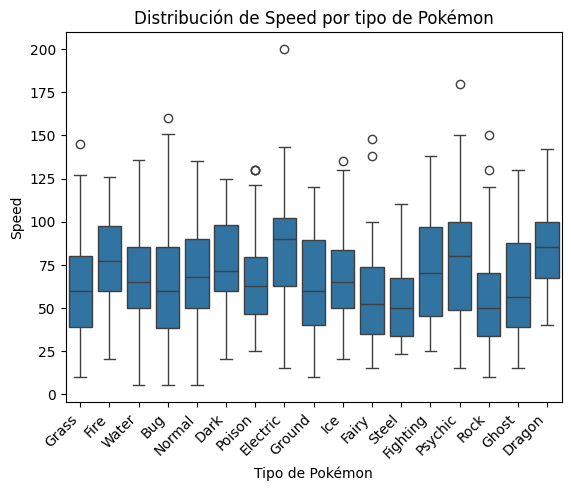

In [170]:
# Boxplot de velocidad por tipo de Pokémonplt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='type', y='speed')
plt.title('Distribución de Speed por tipo de Pokémon')
plt.xlabel('Tipo de Pokémon')
plt.ylabel('Speed')
plt.xticks(rotation=45, ha='right')
plt.show()

# 6. Muestreo e intervalos de confianza

In [171]:
df_gen1 = df[df['generation'] == 1]
df_gen2 = df[df['generation'] == 2]
df_gen3 = df[df['generation'] == 3]
df_gen4 = df[df['generation'] == 4]
df_gen5 = df[df['generation'] == 5]
df_gen6 = df[df['generation'] == 6]
df_gen7 = df[df['generation'] == 7]
df_gen8 = df[df['generation'] == 8]

In [172]:
# Función para calcular intervalos de confianza
def intervalo_confianza(muestra, nivel):
    n = len(muestra)
    media = np.mean(muestra)
    std = np.std(muestra, ddof=1)
    z = norm.ppf(1 - (1 - nivel) / 2)
    margen_error = z * (std / np.sqrt(n))
    return round(media - margen_error, 2), round(media + margen_error, 2)

In [173]:
# Muestreo aleatorio simple de tamaño 30
muestra_aleatoria_gen1 = df_gen1['speed'].sample(n=30, random_state=2)
#muestra_aleatoria_gen1 = pd.DataFrame(muestra_aleatoria_gen1)
muestra_aleatoria_gen1

,speed
12,58
23,145
192,30
25,71
37,90
13,78
77,55
200,50
134,42
54,100


In [174]:
# Muestreo estratificado por tipo
tipos = df_gen1['type'].value_counts(normalize=True)
muestra_por_tipo = (tipos * 30).round().astype(int)

ajuste = 30 - muestra_por_tipo.sum()
if ajuste != 0:
    muestra_por_tipo.iloc[0] += ajuste

muestra_estratificada_gen1 = pd.Series(dtype=int)
for tipo, n in muestra_por_tipo.items():
    subset = df_gen1[df_gen1['type'] == tipo]['speed']
    muestra = subset.sample(n=n, random_state=42)
    muestra_estratificada_gen1 = pd.concat([muestra_estratificada_gen1, muestra])

#muestra_estratificada_gen1 = pd.DataFrame(muestra_estratificada_gen1)
muestra_estratificada_gen1

,0
120,45
136,50
164,115
163,85
84,90
56,20
116,60
57,45
179,48
24,56


# 7. Tabla de frecuencias y resumen



- Muestra aleatoria

In [175]:
freq_abs = muestra_aleatoria_gen1.value_counts().sort_index()
freq_rel = freq_abs / len(muestra_aleatoria_gen1)
freq_rel_acum = freq_rel.cumsum()
z_scores_aleatoria = zscore(muestra_aleatoria_gen1)

tabla_aleatoria = pd.DataFrame({
    'Speed': freq_abs.index,
    'Frecuencia absoluta': freq_abs.values,
    'Frecuencia relativa': freq_rel.values.round(4),
    'Frecuencia relativa acumulada': freq_rel_acum.values.round(4)
})
tabla_z_aleatoria = pd.DataFrame({'Speed': muestra_aleatoria_gen1.values, 'Z': z_scores_aleatoria})
tabla_z_aleatoria = tabla_z_aleatoria.groupby('Speed').agg({'Z': 'mean'}).reset_index()
tabla_aleatoria_final = pd.merge(tabla_aleatoria, tabla_z_aleatoria, on='Speed')
tabla_aleatoria_final

,Speed,Frecuencia absoluta,Frecuencia relativa,Frecuencia relativa acumulada,Z
0,30,4,0.1333,0.1333,-1.238557
1,35,2,0.0667,0.2000,-1.062292
2,40,1,0.0333,0.2333,-0.886027
3,42,1,0.0333,0.2667,-0.815521
4,45,1,0.0333,0.3000,-0.709762
5,50,3,0.1000,0.4000,-0.533496
6,55,1,0.0333,0.4333,-0.357231
7,56,1,0.0333,0.4667,-0.321978
8,58,1,0.0333,0.5000,-0.251472
9,65,2,0.0667,0.5667,-0.004700




*   Muestra estratificada



In [176]:
freq_abs_est = muestra_estratificada_gen1.value_counts().sort_index()
freq_rel_est = freq_abs_est / len(muestra_estratificada_gen1)
freq_rel_acum_est = freq_rel_est.cumsum()
z_scores_est = zscore(muestra_estratificada_gen1)

tabla_estratificada = pd.DataFrame({
    'Speed': freq_abs_est.index,
    'Frecuencia absoluta': freq_abs_est.values,
    'Frecuencia relativa': freq_rel_est.values.round(4),
    'Frecuencia relativa acumulada': freq_rel_acum_est.values.round(4)
})
tabla_z_est = pd.DataFrame({'Speed': muestra_estratificada_gen1.values, 'Z': z_scores_est})
tabla_z_est = tabla_z_est.groupby('Speed').agg({'Z': 'mean'}).reset_index()
tabla_estratificada_final = pd.merge(tabla_estratificada, tabla_z_est, on='Speed')
tabla_estratificada_final

,Speed,Frecuencia absoluta,Frecuencia relativa,Frecuencia relativa acumulada,Z
0,20,1,0.0333,0.0333,-1.765910
1,30,1,0.0333,0.0667,-1.418746
2,35,1,0.0333,0.1000,-1.245164
3,40,1,0.0333,0.1333,-1.071581
4,45,3,0.1000,0.2333,-0.897999
5,48,1,0.0333,0.2667,-0.793850
6,50,3,0.1000,0.3667,-0.724417
7,55,1,0.0333,0.4000,-0.550834
8,56,1,0.0333,0.4333,-0.516118
9,60,1,0.0333,0.4667,-0.377252


In [177]:
resumen_aleatoria = resumen_estadistico(muestra_aleatoria_gen1.to_frame())
resumen_estratificada = resumen_estadistico(muestra_estratificada_gen1.to_frame())

resumen_aleatoria
resumen_estratificada

,Media,Mediana,Moda,Desviación estándar,Varianza,Mínimo,Máximo,Asimetría
0,70.87,65.0,90,29.3,858.33,20,130,0.34


# 8. Graficas descriptivas

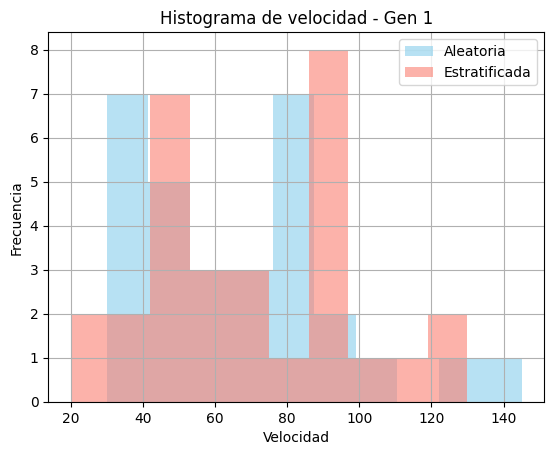

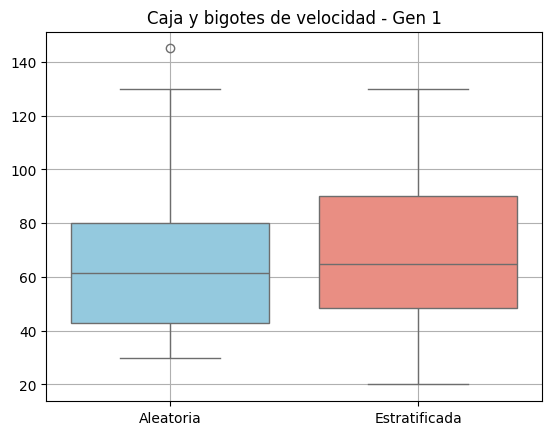

In [178]:
# Histograma
plt.hist(muestra_aleatoria_gen1, bins=10, alpha=0.6, label='Aleatoria', color='skyblue')
plt.hist(muestra_estratificada_gen1, bins=10, alpha=0.6, label='Estratificada', color='salmon')
plt.title('Histograma de velocidad - Gen 1')
plt.xlabel('Velocidad')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

# Caja y bigotes
sns.boxplot(data=[muestra_aleatoria_gen1.values, muestra_estratificada_gen1.values], palette=['skyblue', 'salmon'])
plt.xticks([0, 1], ['Aleatoria', 'Estratificada'])
plt.title('Caja y bigotes de velocidad - Gen 1')
plt.grid(True)
plt.show()


#9. Intervalos de confianza para la media

In [179]:
niveles = [0.85, 0.95, 0.99]

# Aleatoria
ics_aleatoria = {f"{int(n*100)}%": intervalo_confianza(muestra_aleatoria_gen1, n) for n in niveles}
ic_aleatoria_df = pd.DataFrame.from_dict(ics_aleatoria, orient='index', columns=['Inferior', 'Superior'])

# Estratificada
ics_estratificada = {f"{int(n*100)}%": intervalo_confianza(muestra_estratificada_gen1, n) for n in niveles}
ic_estratificada_df = pd.DataFrame.from_dict(ics_estratificada, orient='index', columns=['Inferior', 'Superior'])

ic_aleatoria_df
ic_estratificada_df

,Inferior,Superior
85%,63.17,78.57
95%,60.38,81.35
99%,57.09,84.64


#10. Prueba de hipótesis sobre la media

In [180]:
# Calcular la media real de todos los Pokémon de Gen 1
media_real_gen1 = df_gen1['speed'].mean()

# Prueba t para la muestra aleatoria
t_aleatoria, p_aleatoria = ttest_1samp(muestra_aleatoria_gen1, media_real_gen1)

# Prueba t para la muestra estratificada
t_estratificada, p_estratificada = ttest_1samp(muestra_estratificada_gen1, media_real_gen1)

# Resultados como diccionario
hipotesis_aleatoria = {
    'Media real Gen 1': round(media_real_gen1, 2),
    'Media muestra aleatoria': round(muestra_aleatoria_gen1.mean(), 2),
    'Valor p': round(p_aleatoria, 4),
    'Conclusión': "Se rechaza H0" if p_aleatoria < 0.05 else "No se rechaza H0"
}

hipotesis_estratificada = {
    'Media real Gen 1': round(media_real_gen1, 2),
    'Media muestra estratificada': round(muestra_estratificada_gen1.mean(), 2),
    'Valor p': round(p_estratificada, 4),
    'Conclusión': "Se rechaza H0" if p_estratificada < 0.05 else "No se rechaza H0"
}
print("Hipótesis aleatoria:")

print("p= 0.05")
for key, value in hipotesis_aleatoria.items():
    print(f"{key}: {value}")
    print()

print("Hipótesis estratificada:")
for key, value in hipotesis_estratificada.items():
    print(f"{key}: {value}")
    print()

Hipótesis aleatoria:
p= 0.05
Media real Gen 1: 72.71

Media muestra aleatoria: 65.13

Valor p: 0.1611

Conclusión: No se rechaza H0

Hipótesis estratificada:
Media real Gen 1: 72.71

Media muestra estratificada: 70.87

Valor p: 0.7332

Conclusión: No se rechaza H0



In [181]:
niveles = [0.85, 0.95, 0.99]

# Prueba de hipótesis sobre la media (adaptado)
# Calcular la media real de todos los Pokémon de Gen 1
media_real_gen1 = df_gen1['speed'].mean()

# Prueba t para la muestra aleatoria
t_aleatoria, p_aleatoria = ttest_1samp(muestra_aleatoria_gen1, media_real_gen1)

# Prueba t para la muestra estratificada
t_estratificada, p_estratificada = ttest_1samp(muestra_estratificada_gen1, media_real_gen1)


# Función para mostrar los resultados de la prueba de hipótesis
def mostrar_resultados_hipotesis(nombre_muestra, media_muestra, p_valor, nivel):
    print(f"Hipótesis {nombre_muestra}:")
    print(f"Media real Gen 1: {round(media_real_gen1, 2)}")
    print(f"Media {nombre_muestra}: {round(media_muestra, 2)}")
    print(f"Valor p: {round(p_valor, 4)}")
    print(f"Conclusión: {'Se rechaza H0' if p_valor < 1.0-nivel else 'No se rechaza H0'}")
    print()

# Mostrar resultados para cada nivel de confianza
for nivel in niveles:
    print(f"Nivel de confianza: {int(nivel*100)}%")

    mostrar_resultados_hipotesis("aleatoria", muestra_aleatoria_gen1.mean(), p_aleatoria, nivel)
    mostrar_resultados_hipotesis("estratificada", muestra_estratificada_gen1.mean(), p_estratificada, nivel)


Nivel de confianza: 85%
Hipótesis aleatoria:
Media real Gen 1: 72.71
Media aleatoria: 65.13
Valor p: 0.1611
Conclusión: No se rechaza H0

Hipótesis estratificada:
Media real Gen 1: 72.71
Media estratificada: 70.87
Valor p: 0.7332
Conclusión: No se rechaza H0

Nivel de confianza: 95%
Hipótesis aleatoria:
Media real Gen 1: 72.71
Media aleatoria: 65.13
Valor p: 0.1611
Conclusión: No se rechaza H0

Hipótesis estratificada:
Media real Gen 1: 72.71
Media estratificada: 70.87
Valor p: 0.7332
Conclusión: No se rechaza H0

Nivel de confianza: 99%
Hipótesis aleatoria:
Media real Gen 1: 72.71
Media aleatoria: 65.13
Valor p: 0.1611
Conclusión: No se rechaza H0

Hipótesis estratificada:
Media real Gen 1: 72.71
Media estratificada: 70.87
Valor p: 0.7332
Conclusión: No se rechaza H0

